In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set(style="whitegrid")

# Load the raw JSON file
# Make sure 'public_cases.json' is in the same directory as your notebook
with open('public_cases.json', 'r') as f:
    data = json.load(f)

# --- This is the corrected loading logic ---
# We will load the data, normalize the 'input' column, and join it back.
df = pd.DataFrame(data)
df_input = pd.json_normalize(df['input'])
df = pd.concat([df_input, df['expected_output']], axis=1)

print("Data loaded and cleaned. DataFrame head:")
print(df.head())


Data loaded and cleaned. DataFrame head:
   trip_duration_days  miles_traveled  total_receipts_amount  expected_output
0                   3            93.0                   1.42           364.51
1                   1            55.0                   3.60           126.06
2                   1            47.0                  17.97           128.91
3                   2            13.0                   4.67           203.52
4                   3            88.0                   5.78           380.37


In [3]:
print("DataFrame Info:")
df.info()

print("\nMissing Data Check (per column):")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_duration_days     1000 non-null   int64  
 1   miles_traveled         1000 non-null   float64
 2   total_receipts_amount  1000 non-null   float64
 3   expected_output        1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB

Missing Data Check (per column):
trip_duration_days       0
miles_traveled           0
total_receipts_amount    0
expected_output          0
dtype: int64


In [4]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       trip_duration_days  miles_traveled  total_receipts_amount  \
count         1000.000000      1000.00000             1000.00000   
mean             7.043000       597.41374             1211.05687   
std              3.926139       351.29979              742.85418   
min              1.000000         5.00000                1.42000   
25%              4.000000       275.96000              530.37750   
50%              7.000000       621.00000             1171.90000   
75%             10.000000       893.00000             1881.10500   
max             14.000000      1317.07000             2503.46000   

       expected_output  
count      1000.000000  
mean       1349.114030  
std         470.316464  
min         117.240000  
25%        1019.297500  
50%        1454.260000  
75%        1711.122500  
max        2337.730000  


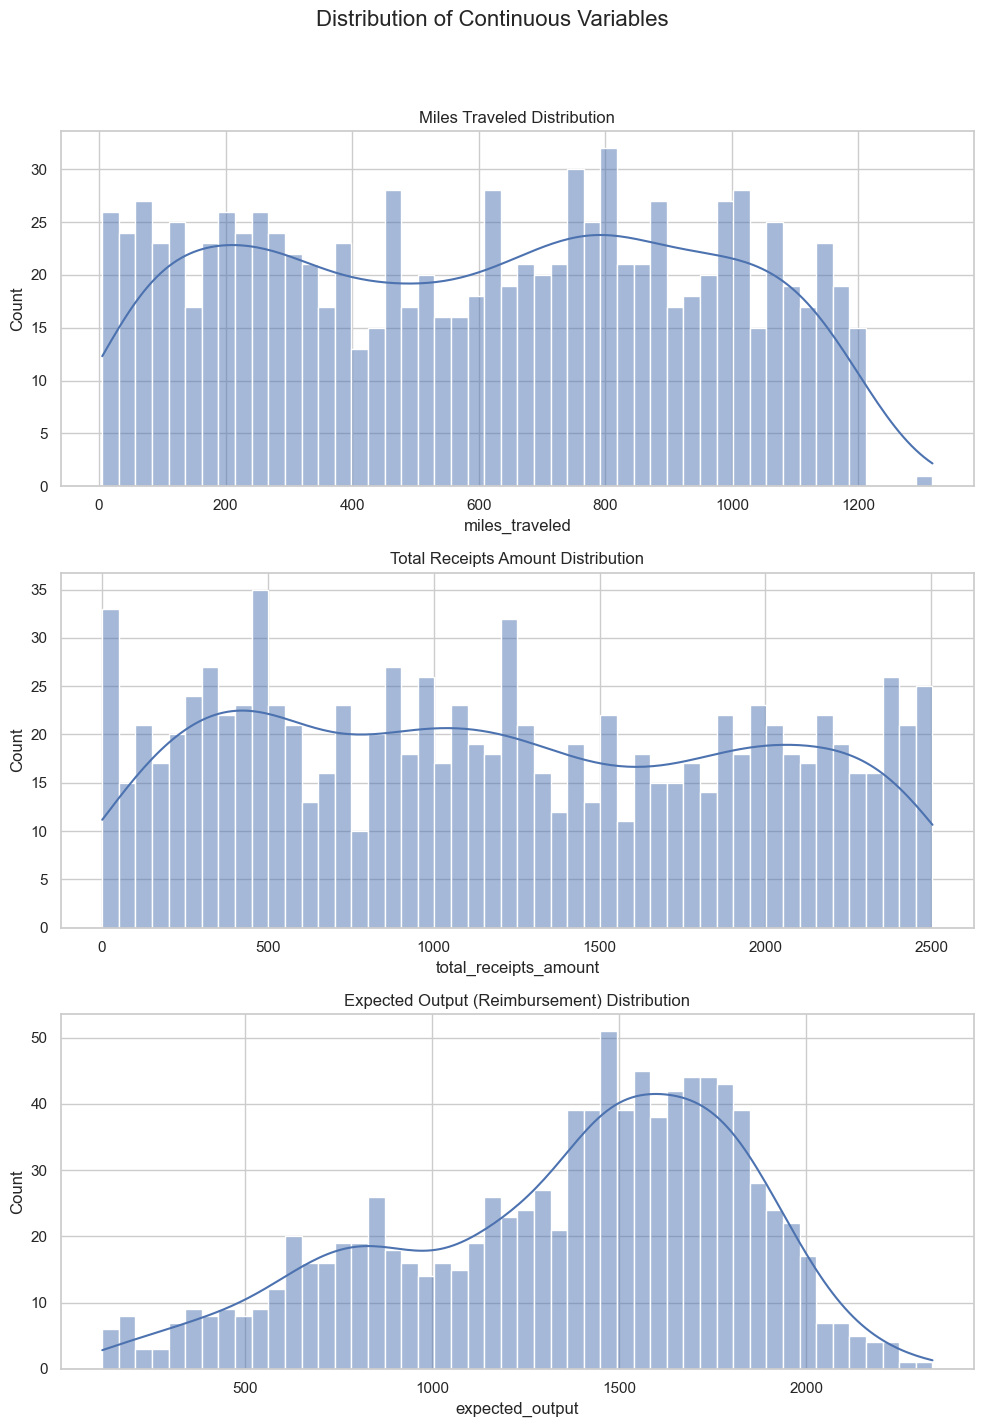

In [6]:
# Create a figure for our plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Distribution of Continuous Variables', fontsize=16)

# Plot miles_traveled
sns.histplot(df['miles_traveled'], kde=True, ax=axes[0], bins=50)
axes[0].set_title('Miles Traveled Distribution')

# Plot total_receipts_amount
sns.histplot(df['total_receipts_amount'], kde=True, ax=axes[1], bins=50)
axes[1].set_title('Total Receipts Amount Distribution')

# Plot expected_output
sns.histplot(df['expected_output'], kde=True, ax=axes[2], bins=50)
axes[2].set_title('Expected Output (Reimbursement) Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

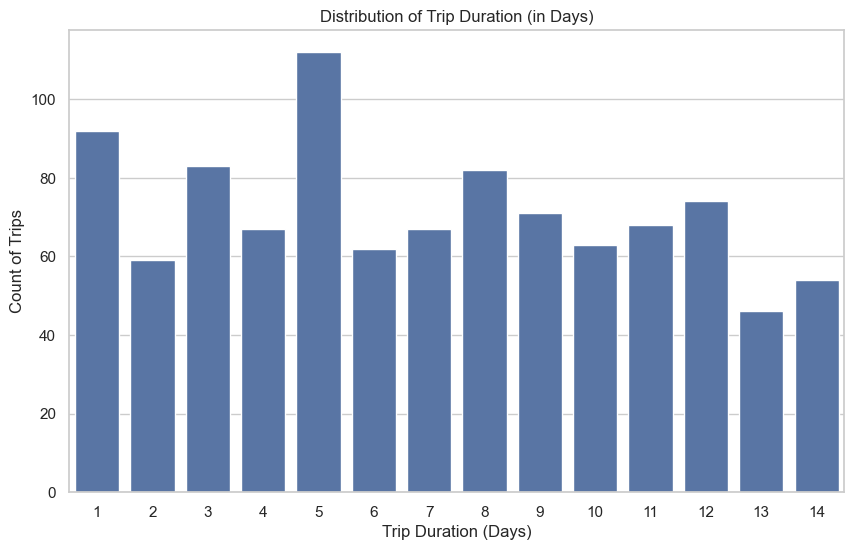

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='trip_duration_days')
plt.title('Distribution of Trip Duration (in Days)')
plt.xlabel('Trip Duration (Days)')
plt.ylabel('Count of Trips')
plt.show()

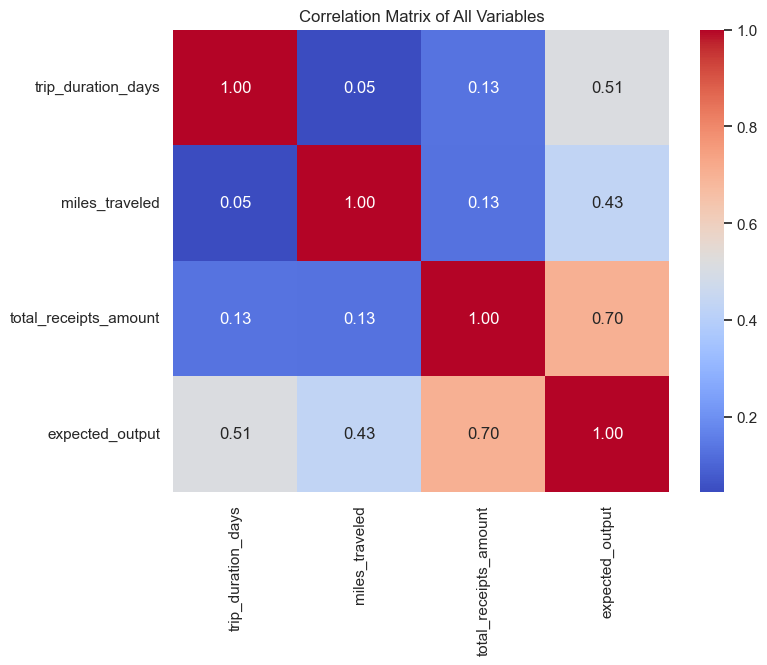

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

Generating PairPlot... (this may take a moment)


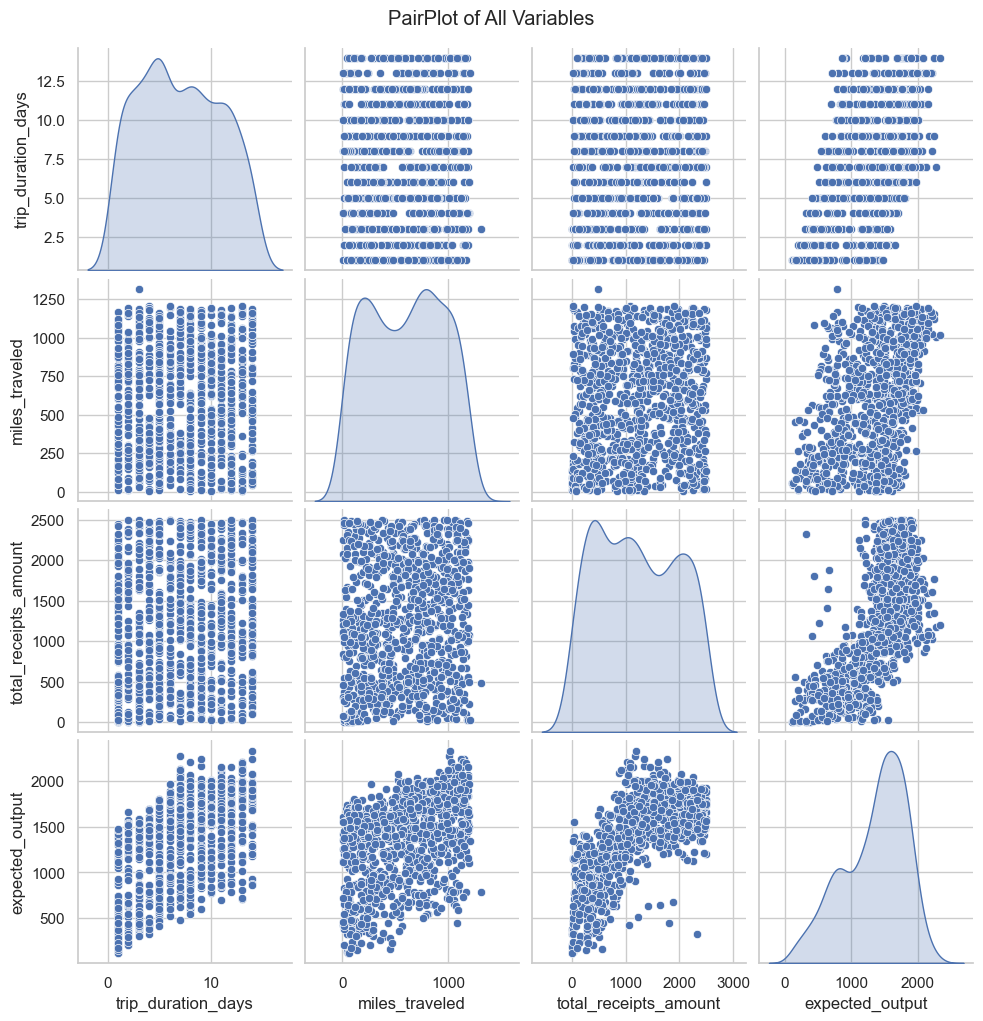

In [10]:
print("Generating PairPlot... (this may take a moment)")
sns.pairplot(df, diag_kind='kde')
plt.suptitle('PairPlot of All Variables', y=1.02)
plt.show()

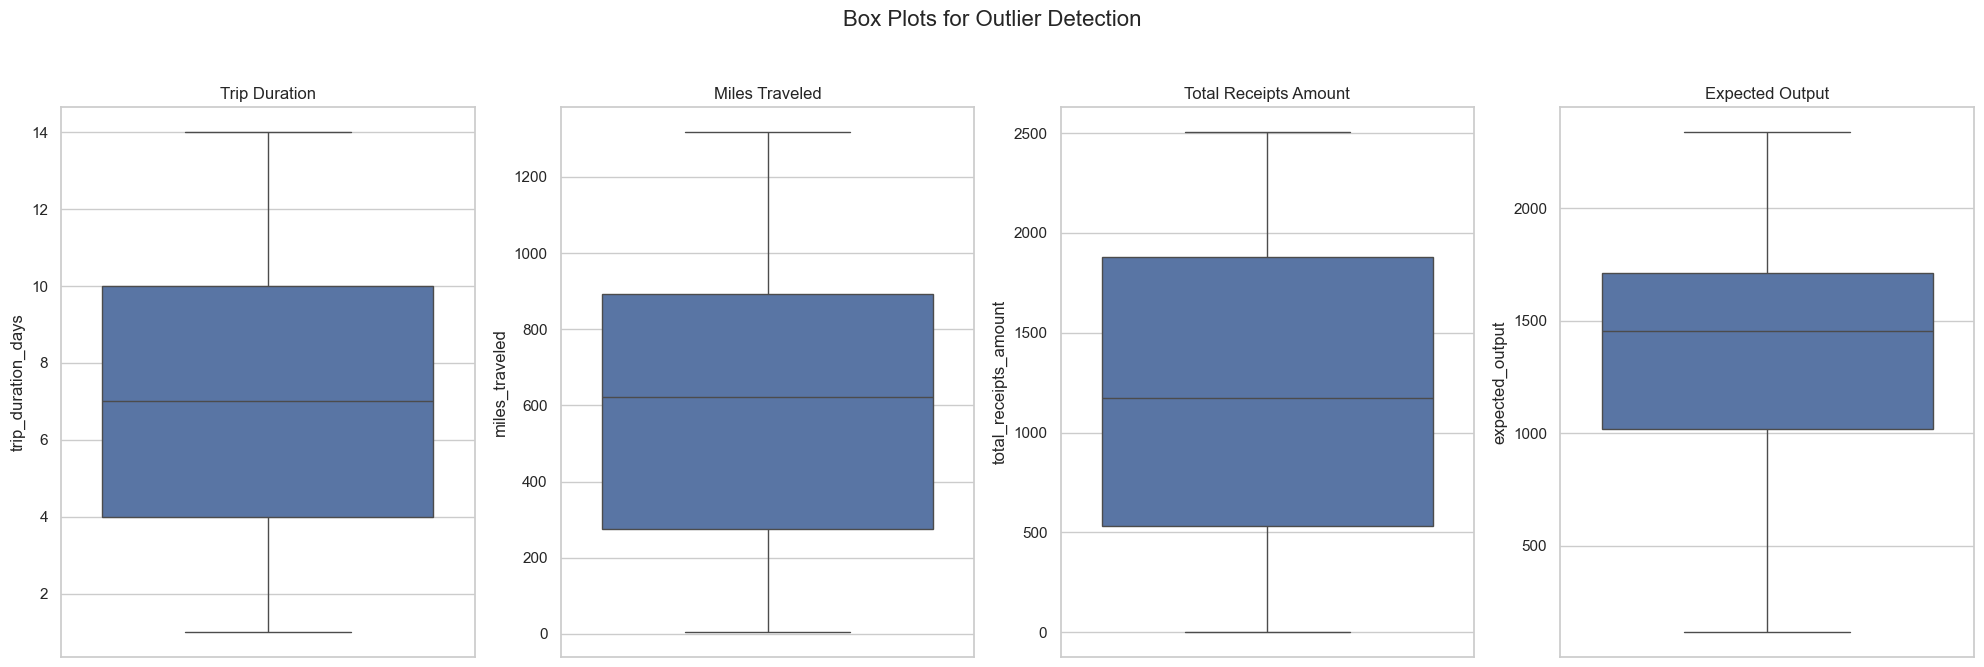

In [12]:
# Create a figure for our plots
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16)

# Plot trip_duration_days
sns.boxplot(data=df, y='trip_duration_days', ax=axes[0])
axes[0].set_title('Trip Duration')

# Plot miles_traveled
sns.boxplot(data=df, y='miles_traveled', ax=axes[1])
axes[1].set_title('Miles Traveled')

# Plot total_receipts_amount
sns.boxplot(data=df, y='total_receipts_amount', ax=axes[2])
axes[2].set_title('Total Receipts Amount')

# Plot expected_output
sns.boxplot(data=df, y='expected_output', ax=axes[3])
axes[3].set_title('Expected Output')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
# --- THIS IS A SNEAK PEEK FOR YOUR NEXT STEP ---
# You don't have to run this, but think about it.

# Create a copy to be safe
df_features = df.copy()

# Example Feature 1: Efficiency (Miles per Day)
# We have to be careful not to divide by zero if days=0, but min is 1.
# Let's handle trips of 0 days just in case, though our data has a min of 1.
df_features['miles_per_day'] = df_features['miles_traveled'] / df_features['trip_duration_days']

# Example Feature 2: Spending per Day
df_features['spending_per_day'] = df_features['total_receipts_amount'] / df_features['trip_duration_days']

# Example Feature 3: Is this a 5-day trip? (Categorical rule)
df_features['is_5_day_trip'] = (df_features['trip_duration_days'] == 5).astype(int)

print("\nExample of new features:")
print(df_features[['trip_duration_days', 'miles_traveled', 'miles_per_day', 'is_5_day_trip']].head())


Example of new features:
   trip_duration_days  miles_traveled  miles_per_day  is_5_day_trip
0                   3            93.0      31.000000              0
1                   1            55.0      55.000000              0
2                   1            47.0      47.000000              0
3                   2            13.0       6.500000              0
4                   3            88.0      29.333333              0
